In [1]:
import pandas as pd
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
with open('1_31_2020_pull.json', 'r') as f:
    data = json.load(f)

In [3]:
stocks = [ stock for stock in data.keys()]

#### Next Day Max/Min Value  (% Difference from Closing Price)

In [4]:
start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            if _low <= -0.2:
                _low = -0.2
            if _low >= 0.05:
                _low = 0.05
            
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            if _max <= -0.05:
                _max = -0.05
            if _max >= 0.2:
                _max = 0.2
            _low = round(_low,2)
            _max = round(_max, 2)
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

#### 3 Day Max/Min Value (% Difference from Closing Price)
The range is from the 2nd day to the 3rd after the input day

In [5]:
start = datetime.datetime.now()
period = [2, 4]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_3'] = _low
        stock_dict_list[index]['Max_3'] = _max
    data[stock] = stock_dict_list
            

#### 10 Day Max/Min Value (% Difference from Closing Price)
The range is from the 4th day to the 10th after the input day

In [6]:
start = datetime.datetime.now()
period = [4, 11]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_10'] = _low
        stock_dict_list[index]['Max_10'] = _max
    data[stock] = stock_dict_list
            

#### 30 Day Max/Min Value (% Difference from Closing Price)
The range is from the 11th day to the 30th after the input day

In [7]:
start = datetime.datetime.now()
period = [11, 31]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_30'] = _low
        stock_dict_list[index]['Max_30'] = _max
    data[stock] = stock_dict_list
            

#### Creating List of Dictionary to convert to a Dataframe 

In [8]:
data_in_list = []
for stock in stocks:
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        dict_['Ticker'] = stock
        data_in_list.append(dict_)
df = pd.DataFrame(data_in_list)   
print(len(df))
df.head()

148289


,Adj Close,Close,Date,High,Low,Low_1,Low_10,Low_3,Low_30,Max_1,Max_10,Max_3,Max_30,Open,Ticker,Volume
0,15.000000,15.000000,2014-01-07 00:00:00,17.00,15.000000,0.00,0.125000,0.068750,-0.012500,0.12,0.250000,0.250000,0.250000,16.0,ITCI,59800.0
1,17.000000,17.000000,2014-01-08 00:00:00,18.00,16.000000,-0.02,0.028571,0.000000,-0.097143,0.01,0.142857,0.142857,0.142857,17.5,ITCI,51100.0
2,17.500000,17.500000,2014-01-09 00:00:00,17.75,17.100000,0.00,0.028571,0.028571,-0.097143,0.14,0.142857,0.100000,0.142857,17.5,ITCI,159900.0
3,18.000000,18.000000,2014-01-10 00:00:00,20.00,17.500000,0.04,0.040571,0.028571,-0.097143,0.06,0.142857,0.100000,0.142857,17.5,ITCI,157100.0
4,18.200001,18.200001,2014-01-13 00:00:00,18.50,18.200001,-0.02,-0.002717,-0.021739,-0.141304,0.05,0.086957,0.032609,0.086957,18.4,ITCI,5000.0


In [9]:
df.columns

Index(['Adj Close', 'Close', 'Date', 'High', 'Low', 'Low_1', 'Low_10', 'Low_3',
       'Low_30', 'Max_1', 'Max_10', 'Max_3', 'Max_30', 'Open', 'Ticker',
       'Volume'],
      dtype='object')

#### Check Null Values

In [10]:
df.isna().sum()

Adj Close       0
Close           0
Date            0
High            0
Low             0
Low_1         190
Low_10       1045
Low_3         380
Low_30       2945
Max_1         190
Max_10       1045
Max_3         380
Max_30       2945
Open            0
Ticker          0
Volume          0
dtype: int64

#### Remove Nulls

In [11]:
df = df.dropna()

In [12]:
df = df.reset_index(drop=True)

### Checking Distribution of the Targets

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


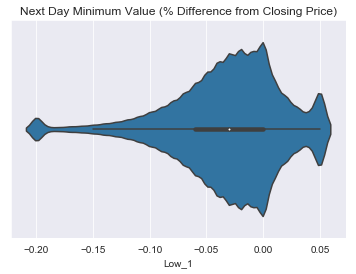

In [13]:
sns.violinplot(x='Low_1', data=df);
plt.title('Next Day Minimum Value (% Difference from Closing Price)');


In [14]:
df.Low_1.describe()


count    145344.000000
mean         -0.032062
std           0.049577
min          -0.200000
25%          -0.060000
50%          -0.030000
75%           0.000000
max           0.050000
Name: Low_1, dtype: float64

In [15]:

df.Low_1.describe()

count    145344.000000
mean         -0.032062
std           0.049577
min          -0.200000
25%          -0.060000
50%          -0.030000
75%           0.000000
max           0.050000
Name: Low_1, dtype: float64

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


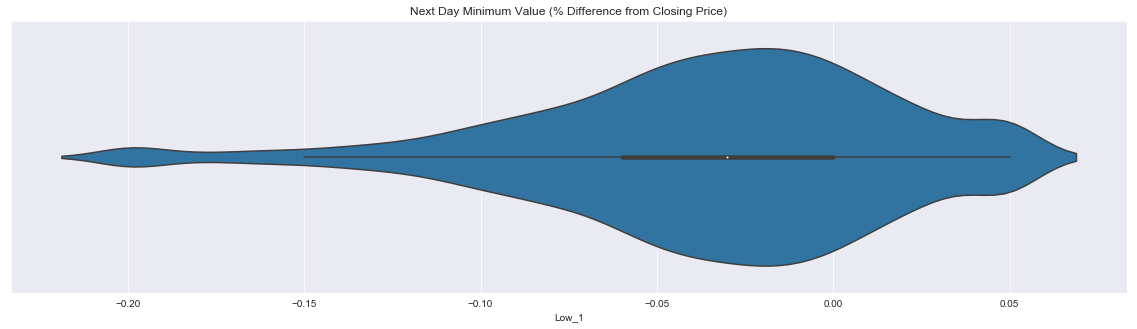

In [16]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Low_1', data=df.loc[df.Ticker == 'SGMO']);
plt.title('Next Day Minimum Value (% Difference from Closing Price)');

The low values were corragated between -5.6% and 0% with many extreme values to the negative and positive. This outcome is not expected because these type stock tend to be volatile, but 5.6% is a very large daily move.   

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


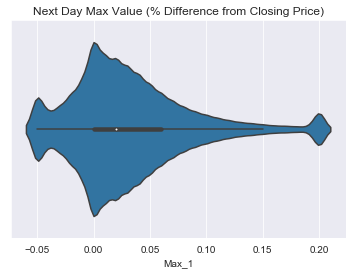

In [17]:

sns.violinplot(x='Max_1', data=df.loc[df.Max_1<1]);
plt.title('Next Day Max Value (% Difference from Closing Price)');

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


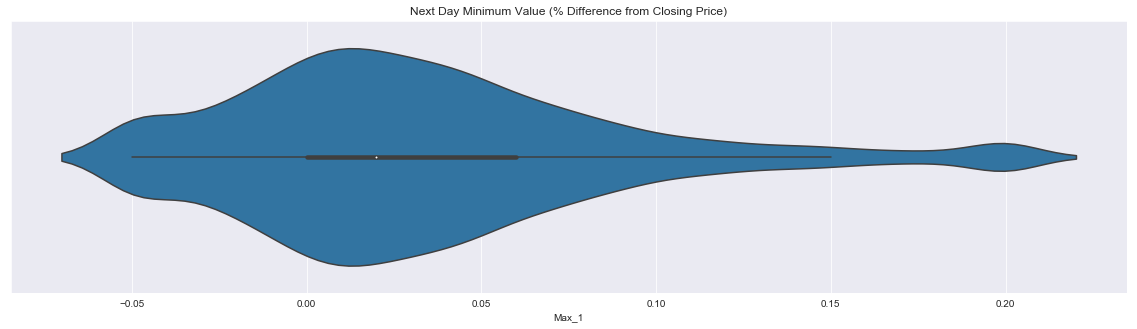

In [18]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Max_1', data=df.loc[df.Ticker == 'SGMO']);
plt.title('Next Day Max Value (% Difference from Closing Price)');

In [19]:
df.Max_1.describe()


count    145344.000000
mean          0.031772
std           0.053553
min          -0.050000
25%           0.000000
50%           0.020000
75%           0.060000
max           0.200000
Name: Max_1, dtype: float64

In [20]:
df.Low_1.loc[df.Low_1 < -0.025].count()/len(df), df.Max_1.loc[df.Low_1 > 0.025].count()/len(df)

(0.5034538749449582, 0.09656401365037429)

The max values seem to be the mirror opposite of the lows  and were corragated between 0% and 5.5% with many extreme values to the negative and positive. Again 5.5% is a very large daily move to be common.   

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


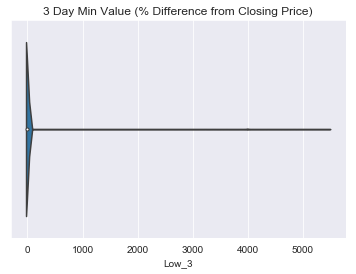

In [21]:


sns.violinplot(x='Low_3', data=df);
plt.title('3 Day Min Value (% Difference from Closing Price)');

In [22]:
df.Low_3.describe()


count    145344.000000
mean          4.134941
std         129.087638
min          -0.999899
25%          -0.080380
50%          -0.036616
75%           0.000000
max        5472.684279
Name: Low_3, dtype: float64

The low values seemed to have extended down with most values between -8.0% and 0% with many extreme values to the negative and positive.   

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


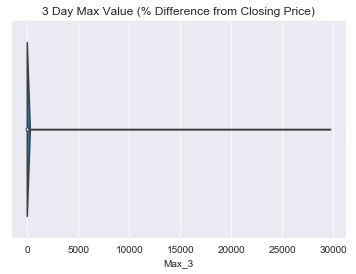

In [23]:

sns.violinplot(x='Max_3', data=df);
plt.title('3 Day Max Value (% Difference from Closing Price)');

In [24]:
df.Max_3.describe()


count    145344.000000
mean         25.670447
std         330.985396
min          -0.999875
25%           0.000000
50%           0.033193
75%           0.083744
max       29665.666409
Name: Max_3, dtype: float64

Again the max values seem to be the mirror opposite of the lows with values between 0% and 8.3% with many extreme values to the negative and positive. 

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


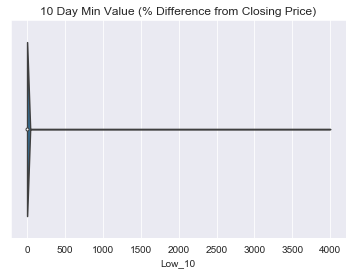

In [25]:

sns.violinplot(x='Low_10', data=df);
plt.title('10 Day Min Value (% Difference from Closing Price)');

In [26]:
df.Low_10.describe()


count    145344.000000
mean         -0.001601
std          18.169208
min          -0.999948
25%          -0.140829
50%          -0.070097
75%          -0.010840
max        3998.999810
Name: Low_10, dtype: float64

The low values extend some more with most values were between -14.0% and 1.1% with many extreme values to the negative and positive.   

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


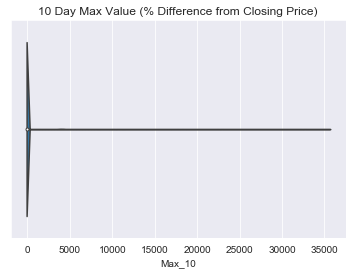

In [27]:
sns.violinplot(x='Max_10', data=df);
plt.title('10 Day Max Value (% Difference from Closing Price)');

In [28]:
df.Max_10.describe()


count    145344.000000
mean         48.961528
std         509.821179
min          -0.999833
25%           0.006579
50%           0.071119
75%           0.163054
max       35599.000796
Name: Max_10, dtype: float64

Again the max values seem to be the mirror opposite of the lows with values between 0.6% and 16.3% with many extreme values to the negative and positive. 

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


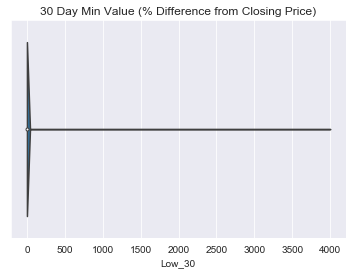

In [29]:
sns.violinplot(x='Low_30', data=df);
plt.title('30 Day Min Value (% Difference from Closing Price)');

In [30]:
df.Low_30.describe()


count    145344.000000
mean          0.087546
std          29.669768
min          -0.999972
25%          -0.237073
50%          -0.124497
75%          -0.021844
max        3998.999810
Name: Low_30, dtype: float64

The low values seemed to have extended down with most values between -8.0% and 0% with many extreme values to the negative and positive.   

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


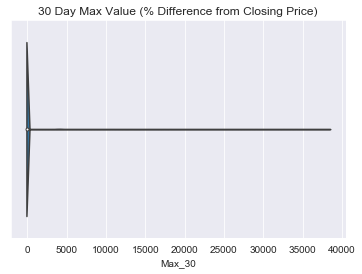

In [31]:

sns.violinplot(x='Max_30', data=df);
plt.title('30 Day Max Value (% Difference from Closing Price)');

In [32]:
df.Max_30.describe()


count    145344.000000
mean         60.233674
std         675.499064
min          -0.951601
25%           0.017811
50%           0.135806
75%           0.308543
max       38399.000858
Name: Max_30, dtype: float64

Again the max values seem to be the mirror opposite of the lows with values between 0% and 8.3% with many extreme values to the negative and positive. 

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


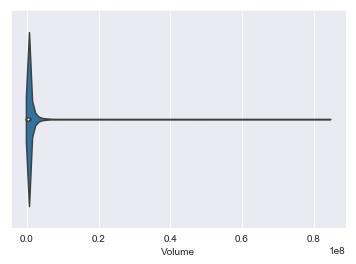

In [33]:
sns.violinplot(x='Volume', data=df);


In [34]:
 df.Volume.describe()

count    1.453440e+05
mean     5.260989e+05
std      1.367123e+06
min      0.000000e+00
25%      4.790000e+04
50%      2.047000e+05
75%      5.499000e+05
max      8.439200e+07
Name: Volume, dtype: float64

In [35]:
((df.High-df.Low)/ df.Low).describe()

count    145344.000000
mean          0.066357
std           0.079632
min           0.000000
25%           0.037037
50%           0.054111
75%           0.079367
max           9.000000
dtype: float64